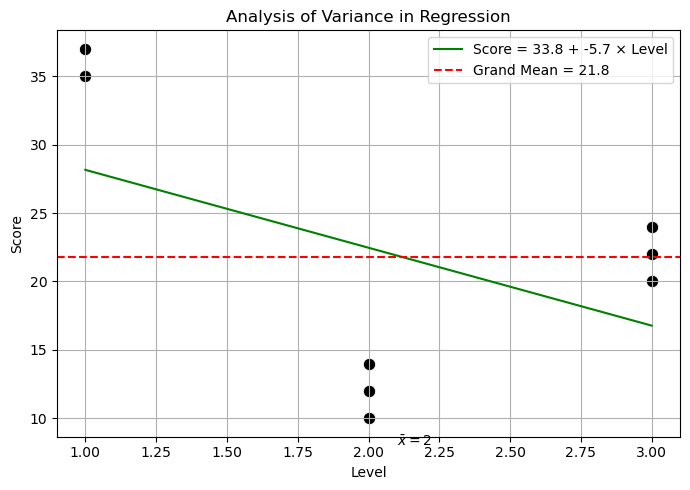

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Data
levels = np.array([1, 1, 2, 2, 2, 3, 3, 3])
scores = np.array([35, 37, 10, 12, 14, 20, 22, 24])

# Fit regression
coef = np.polyfit(levels, scores, deg=1)
slope, intercept = coef
x_vals = np.linspace(1, 3, 100)
y_vals = slope * x_vals + intercept

# Plot
plt.figure(figsize=(7, 5))
sns.scatterplot(x=levels, y=scores, s=80, color='black')
plt.plot(x_vals, y_vals, color='green', label=f'Score = {intercept:.1f} + {slope:.1f} × Level')

# Mean line (grand mean)
grand_mean = np.mean(scores)
plt.axhline(y=grand_mean, color='red', linestyle='--', label=f'Grand Mean = {grand_mean:.1f}')

# Annotations
plt.text(2.1, 8, r"$\bar{x} = 2$", fontsize=10)
plt.title("Analysis of Variance in Regression")
plt.xlabel("Level")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


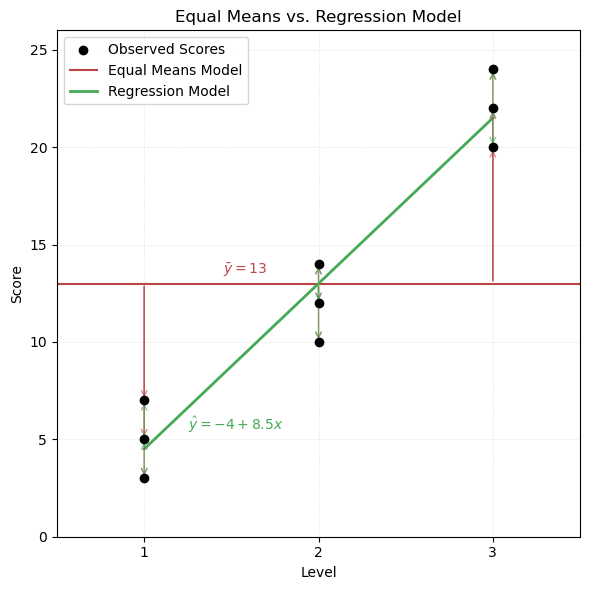

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Data setup
levels = np.repeat([1, 2, 3], 3)
scores = np.array([3, 5, 7, 10, 12, 14, 20, 22, 24])
x_vals = np.array([1, 2, 3])

# Grand mean
grand_mean = np.mean(scores)

# Fit regression model: y = -4 + 8.5x
slope = 8.5
intercept = -4
fitted_scores = intercept + slope * levels

# Plot setup
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xticks(x_vals)
ax.set_xticklabels(['1', '2', '3'])
ax.set_xlabel("Level")
ax.set_ylabel("Score")
ax.set_title("Equal Means vs. Regression Model")

# Scatter data points
ax.scatter(levels, scores, color='black', zorder=5, label='Observed Scores')

# Plot grand mean line
ax.axhline(grand_mean, color='#BB4444', linestyle='-', linewidth=1.5, label='Equal Means Model')

# Plot regression line
reg_x = np.array([1, 3])
reg_y = intercept + slope * reg_x
ax.plot(reg_x, reg_y, color='#44AA55', linewidth=2, label='Regression Model')

# Arrows: total variability (to grand mean, in red)
for x, y in zip(levels, scores):
    ax.annotate('', xy=(x, y), xytext=(x, grand_mean),
                arrowprops=dict(arrowstyle='->', color='#BB4444', lw=1, alpha=0.6))

# Arrows: residuals (to regression line, in green)
for x, y, y_hat in zip(levels, scores, fitted_scores):
    ax.annotate('', xy=(x, y), xytext=(x, y_hat),
                arrowprops=dict(arrowstyle='->', color='#44AA55', lw=1, alpha=0.6))

# Mean label
ax.text(1.45, grand_mean + 0.5, r'$\bar{y} = 13$', color='#BB4444', fontsize=10)

# Regression equation
ax.text(1.25, intercept + slope * 1 + 1, r'$\hat{y} = -4 + 8.5x$', color='#44AA55', fontsize=10)

# Axis limits and grid
ax.set_xlim(0.5, 3.5)
ax.set_ylim(0, 26)
ax.grid(True, which='both', linestyle=':', linewidth=0.5, alpha=0.5)

plt.legend()
plt.tight_layout()
plt.show()



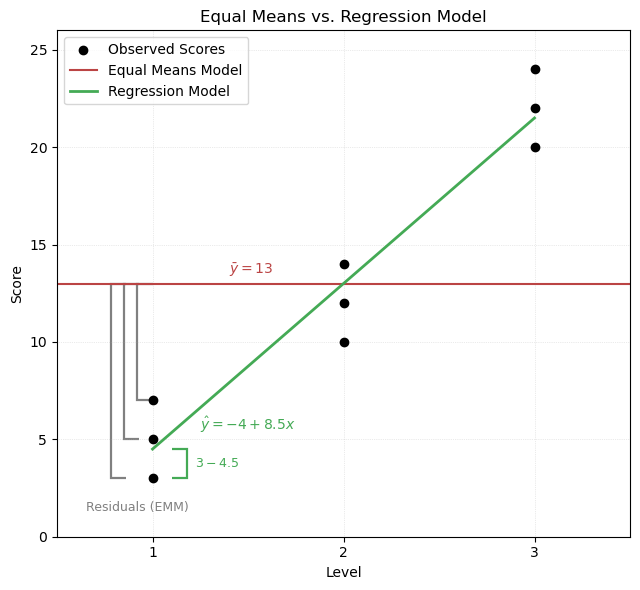

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch
from matplotlib.path import Path

# Data
levels = np.repeat([1, 2, 3], 3)
scores = np.array([3, 5, 7, 10, 12, 14, 20, 22, 24])
grand_mean = np.mean(scores)

# Regression model: y = -4 + 8.5x
slope = 8.5
intercept = -4
fitted_scores = intercept + slope * levels

# Set up plot
fig, ax = plt.subplots(figsize=(6.5, 6))
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['1', '2', '3'])
ax.set_xlabel("Level")
ax.set_ylabel("Score")
ax.set_title("Equal Means vs. Regression Model")

# Scatter plot of observed data
ax.scatter(levels, scores, color='black', zorder=5, label='Observed Scores')

# Equal Means Model (red)
ax.axhline(grand_mean, color='#BB4444', linestyle='-', linewidth=1.5, label='Equal Means Model')

# Regression Model (green)
reg_x = np.array([1, 3])
reg_y = intercept + slope * reg_x
ax.plot(reg_x, reg_y, color='#44AA55', linewidth=2, label='Regression Model')

# Brackets for Equal Means Model residuals (gray)
bracket_depth = 0.08
dx = 0.07
residual_levels = [1, 1, 1]
residual_scores = [3, 5, 7]
shifts = [2 * dx, dx, 0]
for x, y_obs, shift in zip(residual_levels, residual_scores, shifts):
    x_pos = x - shift
    y_top = grand_mean
    y_bot = y_obs
    verts = [
        (x_pos, y_bot),
        (x_pos - bracket_depth, y_bot),
        (x_pos - bracket_depth, y_top),
        (x_pos, y_top)
    ]
    codes = [Path.MOVETO, Path.LINETO, Path.LINETO, Path.LINETO]
    path = Path(verts, codes)
    patch = PathPatch(path, color='gray', lw=1.6, fill=False)
    ax.add_patch(patch)

# Label for residuals (Equal Means)
ax.text(0.65, 1.5, "Residuals (EMM)", fontsize=9, va='center', ha='left', color='gray')

# One residual bracket for regression model (green)
x_resid = 1
y_obs = 3
y_hat = intercept + slope * x_resid
bracket_depth_reg = 0.08
verts = [
    (x_resid + 0.1, y_obs),
    (x_resid + 0.1 + bracket_depth_reg, y_obs),
    (x_resid + 0.1 + bracket_depth_reg, y_hat),
    (x_resid + 0.1, y_hat)
]
codes = [Path.MOVETO, Path.LINETO, Path.LINETO, Path.LINETO]
path = Path(verts, codes)
patch = PathPatch(path, color='#44AA55', lw=1.6, fill=False)
ax.add_patch(patch)

# Residual calculation label
ax.text(x_resid + 0.22, (y_obs + y_hat)/2, r"$3 - 4.5$", fontsize=9,
        va='center', ha='left', color='#44AA55')

# Additional annotations
ax.text(1.4, grand_mean + 0.5, r'$\bar{y} = 13$', color='#BB4444', fontsize=10)
ax.text(1.25, intercept + slope * 1 + 1.0, r'$\hat{y} = -4 + 8.5x$', color='#44AA55', fontsize=10)

# Formatting
ax.set_xlim(0.5, 3.5)
ax.set_ylim(0, 26)
ax.grid(True, which='both', linestyle=':', linewidth=0.5, alpha=0.5)
ax.legend()
plt.tight_layout()
plt.show()


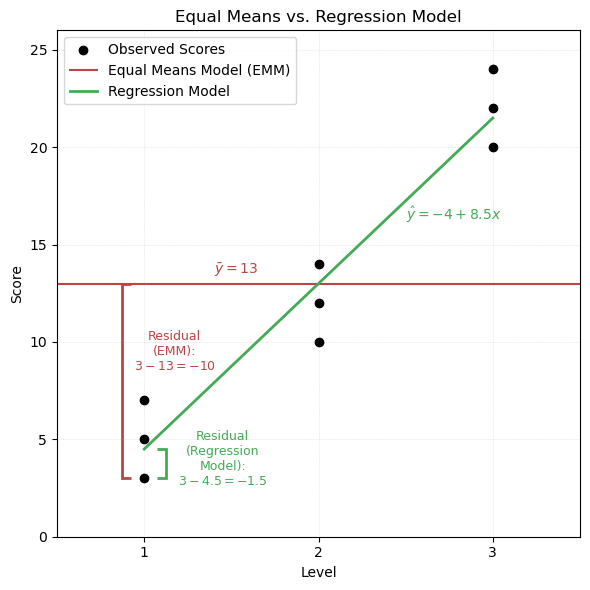

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import PathPatch
from matplotlib.path import Path

# Data
levels = np.repeat([1, 2, 3], 3)
scores = np.array([3, 5, 7, 10, 12, 14, 20, 22, 24])
x_vals = np.array([1, 2, 3])
grand_mean = np.mean(scores)

# Regression
slope = 8.5
intercept = -4
fitted_scores = intercept + slope * levels

# Highlighted residual (Level 1, Score = 3)
highlight_x = 1
highlight_y = 3
highlight_yhat = intercept + slope * highlight_x  # = 4.5

# Bracket shape settings
bracket_depth = 0.05

# Plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xticks(x_vals)
ax.set_xticklabels(['1', '2', '3'])
ax.set_xlabel("Level")
ax.set_ylabel("Score")
ax.set_title("Comparison of Equal Means and Regression Models")

# Observed points
ax.scatter(levels, scores, color='black', zorder=5, label='Observed Scores')

# Equal Means Model line
ax.axhline(grand_mean, color='#BB4444', linestyle='-', linewidth=1.5, label='Equal Means Model (EMM)')

# Regression Model line
reg_x = np.array([1, 3])
reg_y = intercept + slope * reg_x
ax.plot(reg_x, reg_y, color='#44AA55', linewidth=2, label='Regression Model')

# Residual bracket (Equal Means Model)
x_pos = highlight_x - 0.075
verts = [
    (x_pos, highlight_y),
    (x_pos - bracket_depth, highlight_y),
    (x_pos - bracket_depth, grand_mean),
    (x_pos, grand_mean)
]
codes = [Path.MOVETO, Path.LINETO, Path.LINETO, Path.LINETO]
path = Path(verts, codes)
patch = PathPatch(path, color='#BB4444', lw=2, fill=False)
ax.add_patch(patch)
# ax.text(x_pos + 0.25, (highlight_y + grand_mean)/2 + 1,
#         r"$3 - 13 = -10$", color='#BB4444', fontsize=10,
#         va='center', ha='center')
ax.text(
    x_pos + 0.25, (highlight_y + grand_mean)/2 + 1.5,
    "Residual\n(EMM):\n" + r"$3 - 13 = -10$",
    color='#BB4444', fontsize=9,
    va='center', ha='center'
)


# Residual bracket (Regression Model)
x_pos_r = highlight_x + 0.075
verts_r = [
    (x_pos_r, highlight_y),
    (x_pos_r + bracket_depth, highlight_y),
    (x_pos_r + bracket_depth, highlight_yhat),
    (x_pos_r, highlight_yhat)
]
codes_r = [Path.MOVETO, Path.LINETO, Path.LINETO, Path.LINETO]
path_r = Path(verts_r, codes_r)
patch_r = PathPatch(path_r, color='#44AA55', lw=2, fill=False)
ax.add_patch(patch_r)
# ax.text(x_pos_r + 0.375, (highlight_y + highlight_yhat)/2,
#         r"$3 - 4.5 = -1.5$", color='#44AA55', fontsize=10,
#         va='center', ha='center')
ax.text(x_pos_r + 0.375, (highlight_y + highlight_yhat)/2 + 0.25,
        "Residual\n(Regression\nModel):\n" + r"$3 - 4.5 = -1.5$", color='#44AA55', fontsize=9,
        va='center', ha='center')

# Mean and regression equation labels
ax.text(1.4, grand_mean + 0.5, r'$\bar{y} = 13$', color='#BB4444', fontsize=10)
ax.text(2.5, intercept + slope * 2.5 - 1, r'$\hat{y} = -4 + 8.5x$', color='#44AA55', fontsize=11, fontweight='bold')

# Grid and layout
ax.set_xlim(0.5, 3.5)
ax.set_ylim(0, 26)
ax.grid(True, which='both', linestyle=':', linewidth=0.5, alpha=0.5)
ax.legend()
plt.tight_layout()
plt.show()
